In [53]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [54]:
data=pd.read_csv("combined_vertical.csv")
cols = ["EXTraS_Ape_v0.XMM_EP_8_FLUX", "EXTraS_Ape_v0.XMM_EP_8_FLUX_ERR"]
num_cols = data.select_dtypes(include="number").columns
data.head(15).style.format({c: "{:.4e}" for c in cols}).set_properties(**{
    "background-color": "#1e1e1e",
    "color": "#8ecae6",
    "border-color": "#444"
}).set_table_styles([
    {"selector": "th", "props": [("background-color", "#333"), ("color", "#8ecae6")]},
    {"selector": "td", "props": [("border", "1px solid #444")]},
])

/var/folders/7_/qw3sy4r152x3ww4y67spwck00000gn/T/ipykernel_50420/3642119816.py:1: DtypeWarning: Columns (29) have mixed types. Specify dtype option on import or set low_memory=False.
  data=pd.read_csv("combined_vertical.csv")


,EXTraS_Ape_v0.OBS_ID,EXTraS_Ape_v0.XMM_RA,EXTraS_Ape_v0.XMM_DEC,EXTraS_Ape_v0.XMM_EP_8_FLUX,EXTraS_Ape_v0.XMM_EP_8_FLUX_ERR,main_id,ra,dec,otype,main_type,other_types,plx,plx_err,B,V,R,J,H,K,u,g,r,i,z,distance_pc,distance_ly,distance_cm,XLuminosity,VisibleLuminosity,name,class,id_type,scale,b1,b2,r1,r2,flux_0,flux_1,flux_2,flux_3,flux_4,flux_5,flux_6,flux_7,flux_8,flux_9,flux_10,flux_11,flux_12,flux_13,flux_14,flux_15,flux_16,flux_17,flux_18,flux_19,flux_20,flux_21,flux_22,flux_23,flux_24,flux_25,flux_26,flux_27,flux_28,flux_29,flux_30,flux_31,flux_32,flux_33,flux_34,flux_35,flux_36,flux_37,flux_38,flux_39,flux_40,flux_41,flux_42,flux_43,flux_44,flux_45,flux_46,flux_47,flux_48,flux_49,flux_50,flux_51,flux_52,flux_53,flux_54,flux_55,flux_56,flux_57,flux_58,flux_59,flux_60,flux_61,flux_62,flux_63,flux_64,flux_65,flux_66,flux_67,flux_68,flux_69,flux_70,flux_71,flux_72,flux_73,flux_74,flux_75,flux_76,flux_77,flux_78,flux_79,flux_80,flux_81,flux_82,flux_83,flux_84,flux_85,flux_86,flux_87,flux_88,flux_89,flux_90,flux_91,flux_92
0,411780701.000000,329.717000,-30.225400,2.5243e-11,6.0745e-14,QSO B2155-304,329.716938,-30.225588,BLL,BLLac,UV|X|V*|AGN|smm|Opt|cm|Bla|BL?|G|gam|NIR|*|QSO|MIR|BLL|Rad|Bz?,0.015800,0.019100,13.360000,13.090000,12.620000,11.398000,10.460000,10.134000,nan,nan,nan,nan,nan,63291.139241,206427.848101,195296049367088514465792.000000,12098673429095002186147827443688275968.000000,87409269821769387497756395162623279104.000000,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
1,412580801.000000,82.187000,-65.448200,5.6507e-11,2.0452e-13,V* AB Dor,82.186963,-65.448666,TT*,TTauri*,UV|V*|X|PM*|Er*|Ro*|NIR|IR|*|MIR|**|TT*|Em*,67.333100,0.441400,7.856000,6.999000,6.496000,5.316000,4.845000,4.686000,nan,nan,nan,nan,nan,14.851537,48.439178,45827053559096492032.000000,1491279526343945737254163447808.000000,1135619864130781541514532639211520.000000,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
2,412981701.000000,15.779800,-71.860800,4.2829e-14,1.8823e-14,2MASS J01030720-7151420,15.780000,-71.861653,RB?,RGB*_Candidate,NIR|*|MIR|RB?,1.840600,0.034200,17.960000,16.620000,nan,14.111000,13.399000,13.156000,nan,nan,nan,nan,nan,543.301097,1772.009127,1676452015647071666176.000000,1512624261784524216498267357184.000000,371240176102921007195071577063424.000000,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
3,412981701.000000,15.409200,-71.903600,2.7227e-14,1.4413e-14,UCAC4 091-002858,15.407673,-71.904531,*,Star,X|NIR|*,11.182700,0.198700,13.060000,11.880000,11.700000,9.890000,9.320000,9.180000,nan,nan,nan,nan,nan,89.423842,291.661227,275933144947105792000.000000,26050675585787850811217281024.000000,487392048283855364600038537822208.000000,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,n

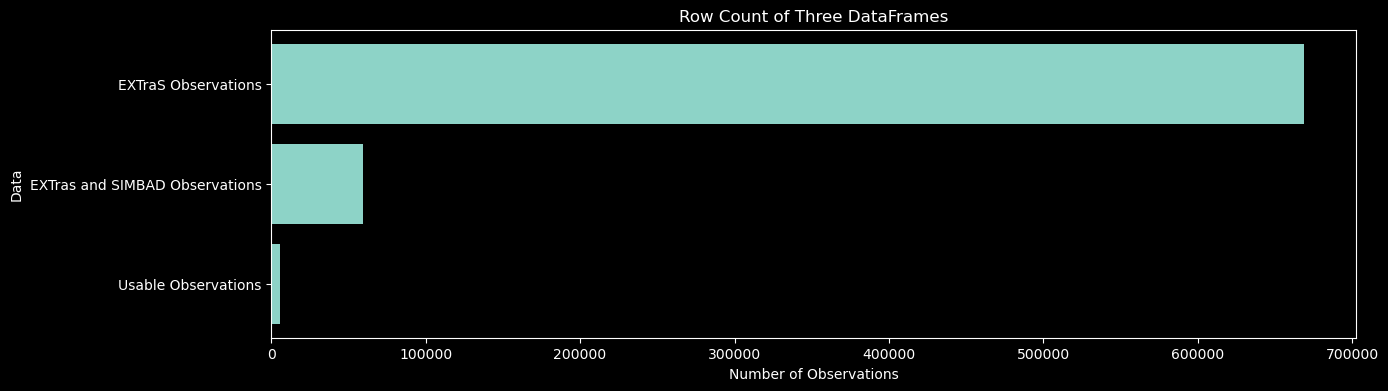

In [55]:
bigData=pd.read_csv("headedBigData.csv")
crossData=pd.read_csv("quarterCrossHeadedBigData.csv")
count_df3 = len(bigData)
count_df2 = len(crossData)
count_df1 = len(data)
counts = [count_df1, count_df2, count_df3]
labels = ['Usable Observations', 'EXTras and SIMBAD Observations', 'EXTraS Observations']

plt.figure(figsize=(14,4))
plt.barh(labels, counts)
plt.xlabel('Number of Observations')
plt.ylabel('Data')
plt.title('Row Count of Three DataFrames')
plt.show()

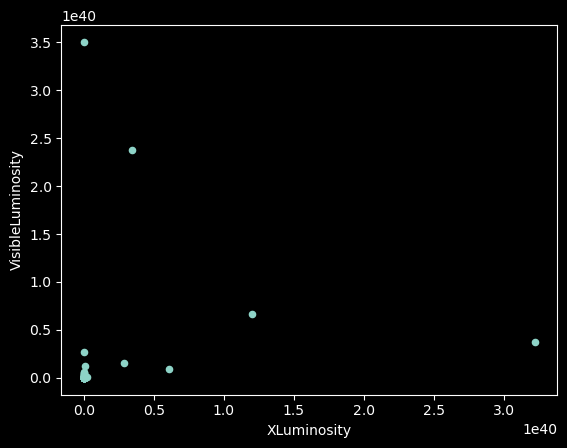

In [56]:
x='XLuminosity'
y='VisibleLuminosity'
plt.style.use('dark_background') 
data.plot.scatter(x,y)
plt.show() #Questo plot non ci dice niente, proviamo a guardare la scala logaritmica

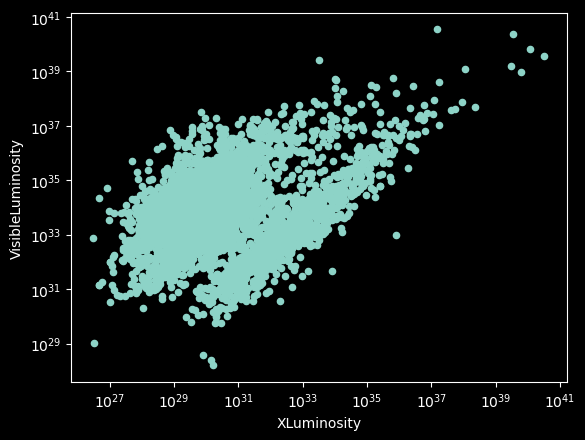

In [57]:

data.plot.scatter(x,y)
plt.xscale("log")
plt.yscale("log")
plt.show()
#mentre è più interessante, uno scatterplot default è abbastanza inutilizzabile

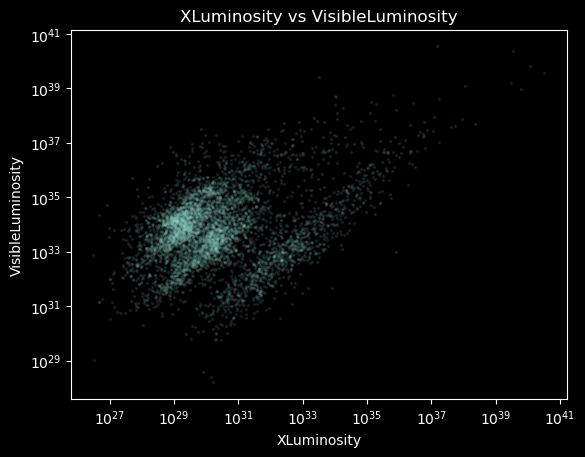

In [58]:
data.plot.scatter(x,y, s=2, alpha=0.1)
plt.xscale("log")
plt.yscale("log")
plt.title("XLuminosity vs VisibleLuminosity")
plt.show()
#un paio di grafici coi punti ridotti di dimensione e semitrasparenti

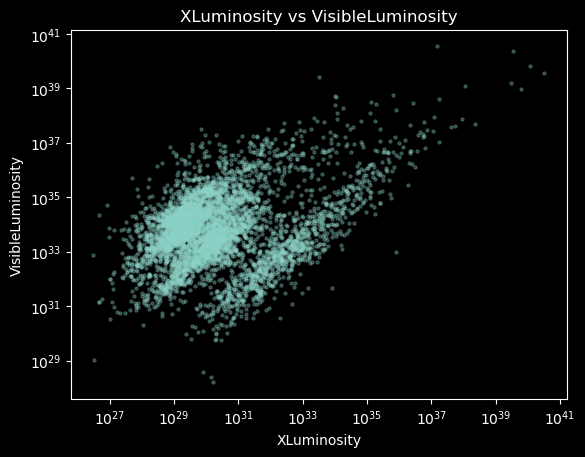

In [59]:

data.plot.scatter(x,y, s=5, alpha=0.3)
plt.xscale("log")   
plt.yscale("log")   
plt.title("XLuminosity vs VisibleLuminosity")
plt.show()

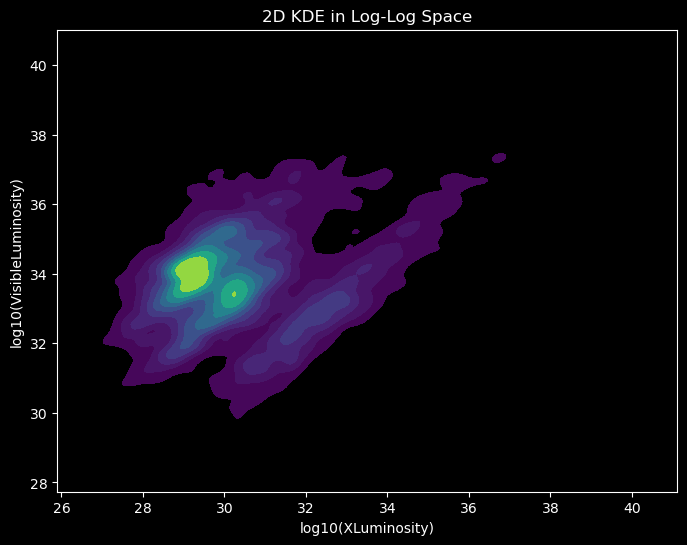

In [60]:
import seaborn as sns
# Remove non-positive values for log scale
x = data["XLuminosity"].values
y = data["VisibleLuminosity"].values
mask = (x > 0) & (y > 0)
x = x[mask]
y = y[mask]

# Take log10 of the data
log_x = np.log10(x)
log_y = np.log10(y)

# KDE plot in log-log space
plt.figure(figsize=(8,6))
sns.kdeplot(x=log_x, y=log_y, fill=True, cmap='viridis', bw_adjust=0.5)

plt.xlabel("log10(XLuminosity)")
plt.ylabel("log10(VisibleLuminosity)")
plt.title("2D KDE in Log-Log Space")
plt.show()
#heatmap che mostra più chiaramente i due hotspot nella distribuzione delle stelle

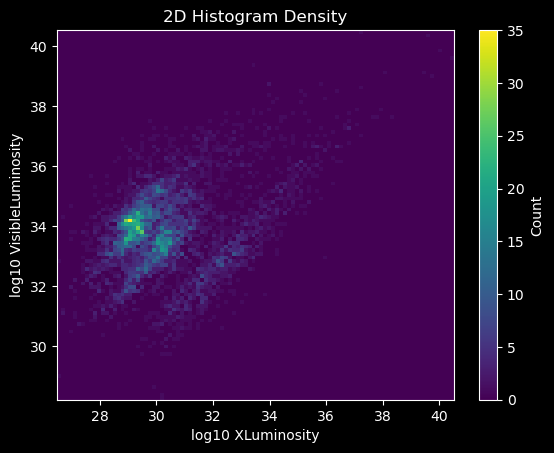

In [61]:
H, xedges, yedges = np.histogram2d(np.log10(x), np.log10(y), bins=100)
plt.imshow(H.T, origin='lower', cmap='viridis', aspect='auto',
           extent=[xedges.min(), xedges.max(), yedges.min(), yedges.max()])
plt.xlabel("log10 XLuminosity")
plt.ylabel("log10 VisibleLuminosity")
plt.title("2D Histogram Density")
plt.colorbar(label="Count")
plt.show()

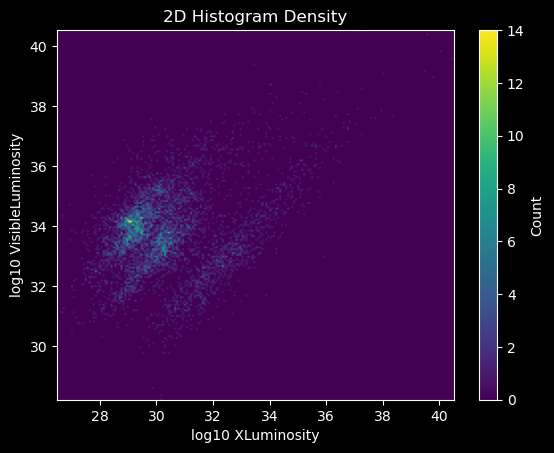

In [62]:
H, xedges, yedges = np.histogram2d(np.log10(x), np.log10(y), bins=200)
plt.imshow(H.T, origin='lower', cmap='viridis', aspect='auto',
           extent=[xedges.min(), xedges.max(), yedges.min(), yedges.max()])
plt.xlabel("log10 XLuminosity")
plt.ylabel("log10 VisibleLuminosity")
plt.title("2D Histogram Density")
plt.colorbar(label="Count")
plt.show()

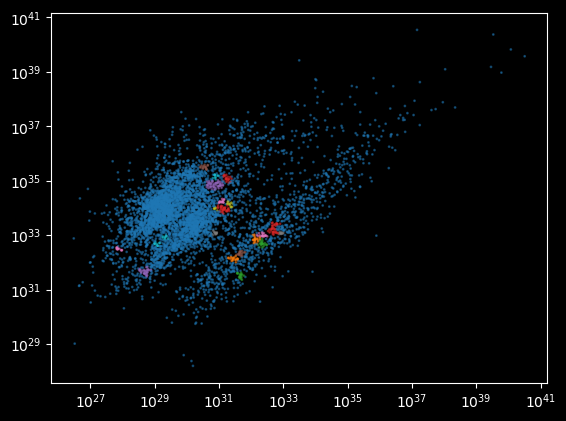

In [63]:
from sklearn.cluster import DBSCAN

X = np.column_stack([np.log10(x), np.log10(y)])
db = DBSCAN(eps=0.1, min_samples=10).fit(X)
labels = db.labels_

plt.scatter(x, y, c=labels, cmap='tab10', s=1, alpha=0.5)
plt.xscale('log')
plt.yscale('log')
plt.show()
#not really useful

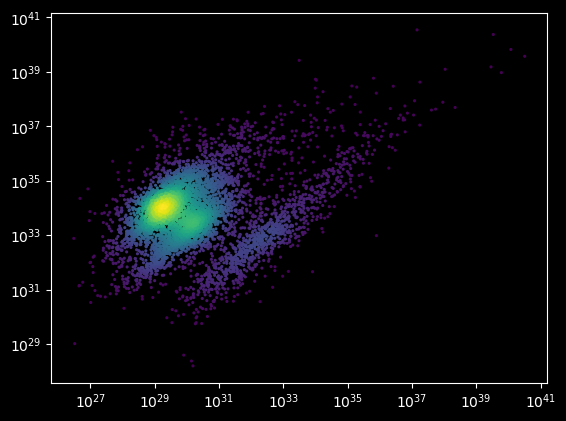

In [64]:
from scipy.stats import gaussian_kde
xy = np.vstack([np.log10(x), np.log10(y)])
z = gaussian_kde(xy)(xy)

plt.scatter(x, y, c=z, s=5, edgecolor='none')
plt.xscale('log')
plt.yscale('log')
plt.show()

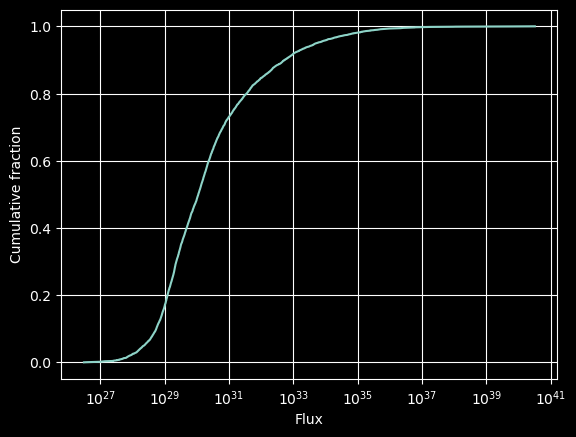

In [65]:

column = "XLuminosity"   
datas = data[column].dropna()            

sorted_data = np.sort(datas)
cdf = np.arange(1, len(sorted_data)+1) / len(sorted_data)

plt.plot(sorted_data, cdf)
plt.xscale('log')
plt.xlabel('Flux')
plt.ylabel('Cumulative fraction')
plt.grid(True)
plt.show()

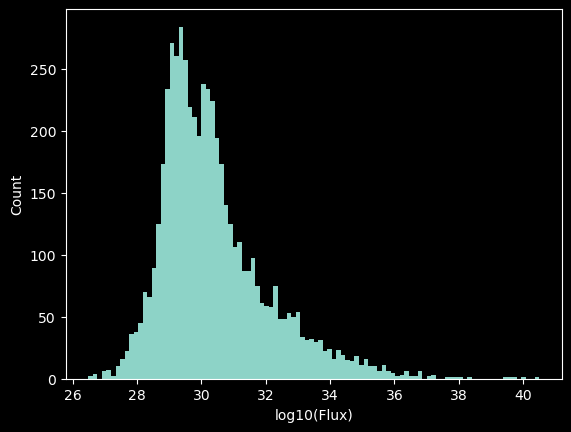

In [66]:
logF = np.log10(datas)
plt.hist(logF, bins=100)
plt.xlabel('log10(Flux)')
plt.ylabel('Count')
plt.show()

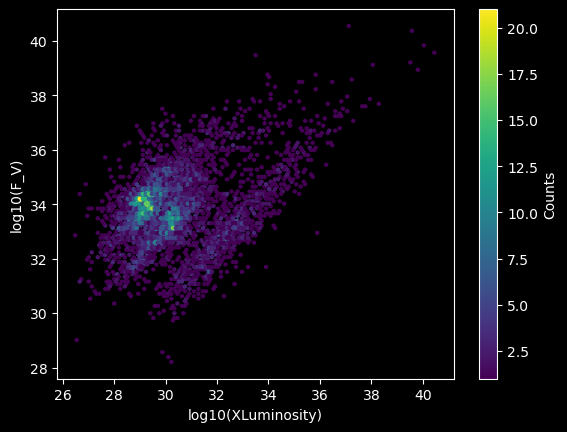

In [67]:

x = data["XLuminosity"].to_numpy()
y = data["VisibleLuminosity"].to_numpy()

# Filter non-positive values (log cannot take <=0)
mask = (x > 0) & (y > 0)
x = x[mask]
y = y[mask]

# Log transform
logx = np.log10(x)
logy = np.log10(y)

plt.hexbin(logx, logy, gridsize=120, mincnt=1)
plt.xlabel("log10(XLuminosity)")
plt.ylabel("log10(F_V)")
plt.colorbar(label="Counts")
plt.show()

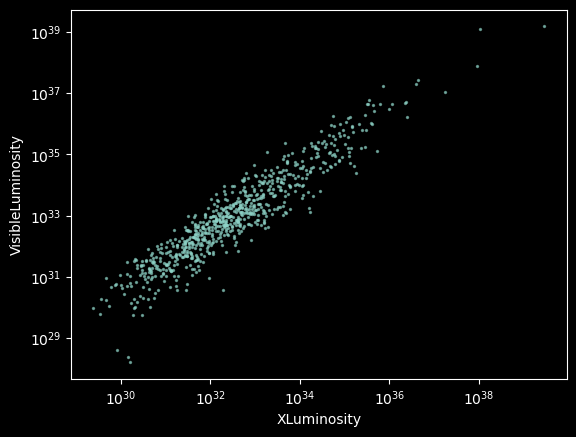

In [68]:
datatype=data[data["main_type"]=="QSO"]
x='XLuminosity'
y='VisibleLuminosity'
datatype.plot.scatter(x,y,  s=2, alpha=0.6)
plt.xscale("log")
plt.yscale("log")
plt.show()

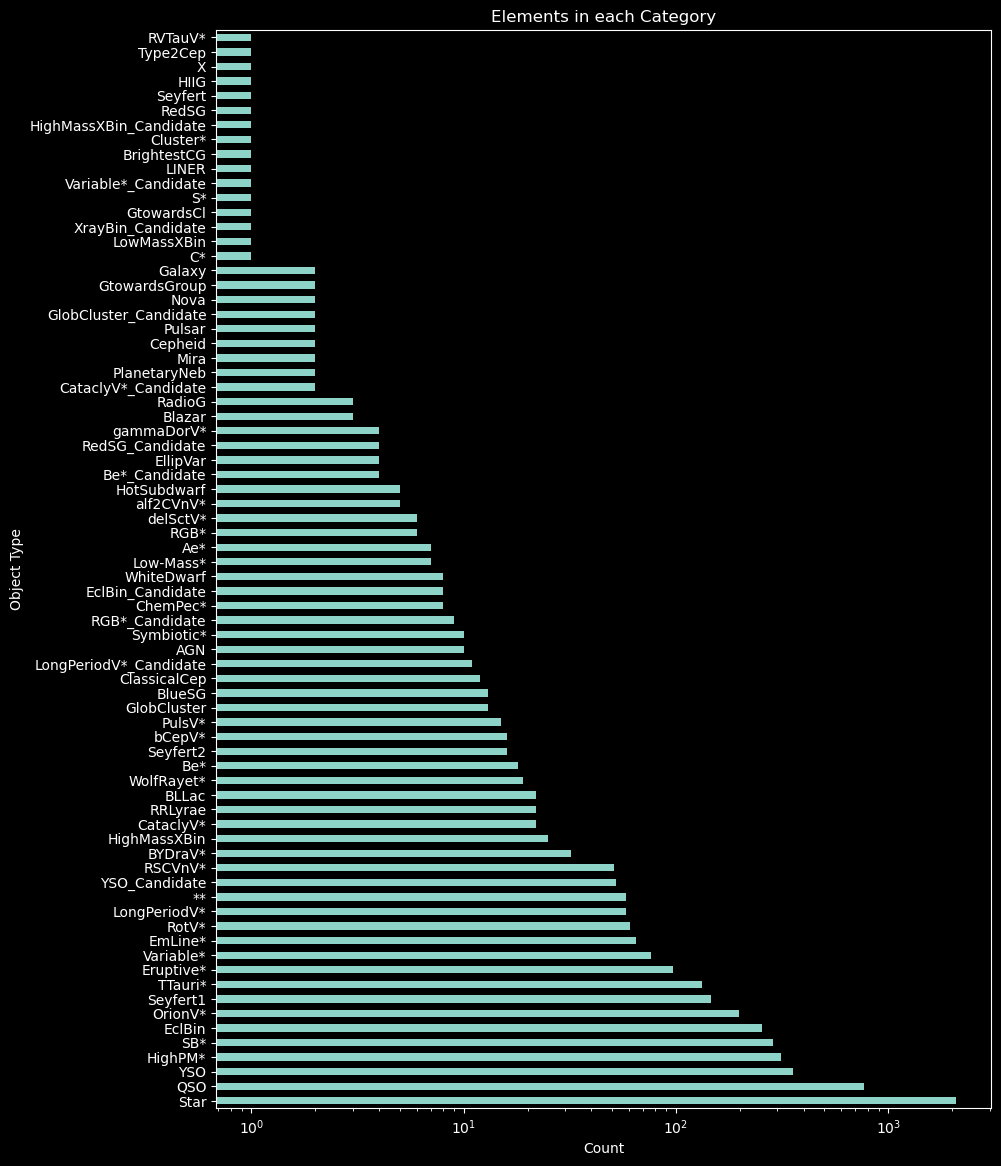

In [69]:
freq=data['main_type'].value_counts()


plt.figure(figsize=(10,14))
freq.plot(kind='barh')

plt.ylabel("Object Type")
plt.xlabel("Count")
plt.xscale("log")
plt.title("Elements in each Category")

plt.show()

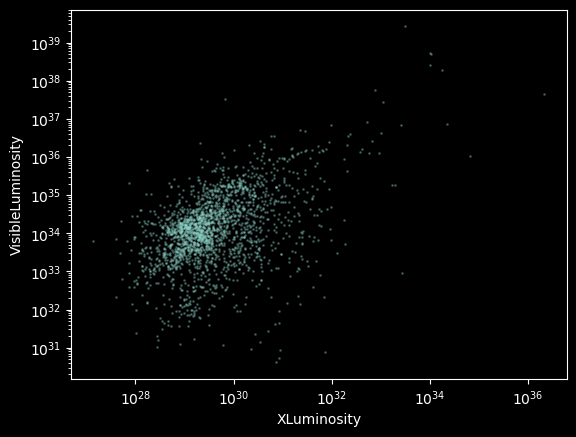

In [70]:
datatype=data[data["main_type"]=="Star"]
x='XLuminosity'
y='VisibleLuminosity'

datatype.plot.scatter(x,y,  s=1, alpha=0.3)
plt.xscale("log")
plt.yscale("log")
plt.show()

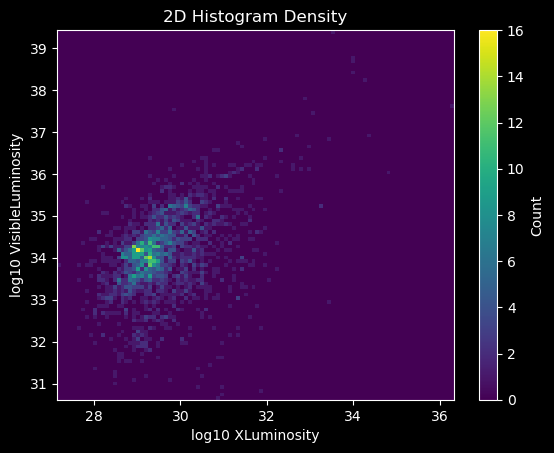

In [71]:
x = datatype["XLuminosity"].values
y = datatype["VisibleLuminosity"].values
mask = (x > 0) & (y > 0)
x = x[mask]
y = y[mask]
H, xedges, yedges = np.histogram2d(np.log10(x), np.log10(y), bins=100)
plt.imshow(H.T, origin='lower', cmap='viridis', aspect='auto',
           extent=[xedges.min(), xedges.max(), yedges.min(), yedges.max()])
plt.xlabel("log10 XLuminosity")
plt.ylabel("log10 VisibleLuminosity")
plt.title("2D Histogram Density")
plt.colorbar(label="Count")
plt.show()

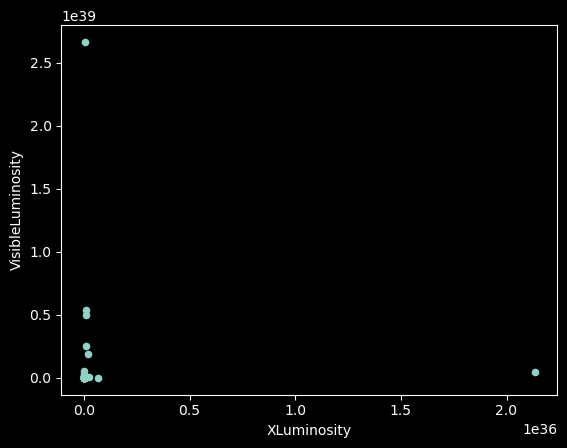

In [72]:
datatype=data[data["main_type"]=="Star"]
x='XLuminosity'
y='VisibleLuminosity'

datatype.plot.scatter(x,y)

plt.show()

/var/folders/7_/qw3sy4r152x3ww4y67spwck00000gn/T/ipykernel_50420/170782540.py:1: DtypeWarning: Columns (29) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('combined_vertical.csv')


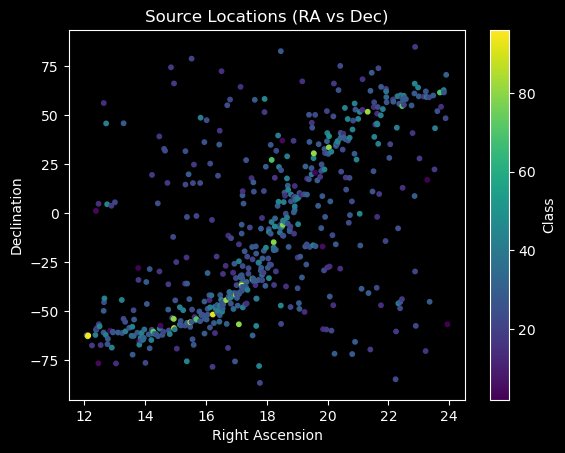

In [90]:

df = pd.read_csv('combined_vertical.csv')

# scatter plot che rappresenta la posizione di tutte le 531 sorgenti luminose sulla sfera celeste, utilizzando le coordinate astronomiche standard
plt.scatter(df['ra'], df['dec'], c=df['class'], cmap='viridis', s=10)
plt.title('Source Locations (RA vs Dec)')
plt.xlabel('Right Ascension') # indica la "longitudine" celeste
plt.ylabel('Declination') # indica la "latitudine" celeste
plt.colorbar(label='Class')
plt.show()



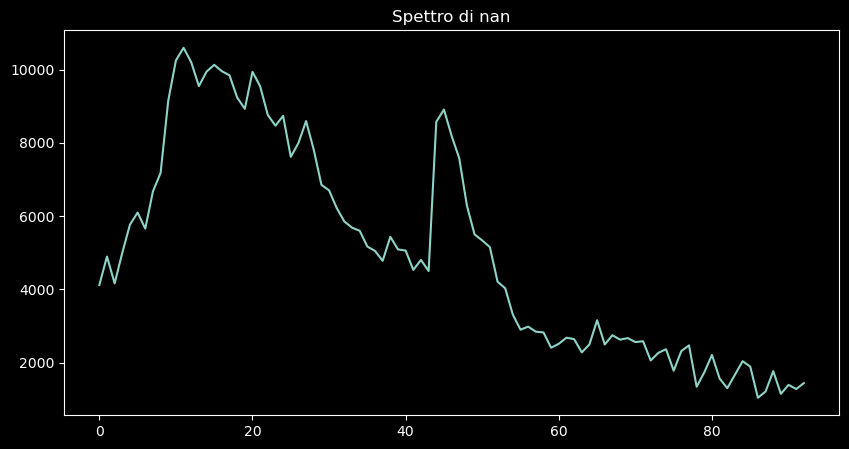

In [91]:
#cerca la prima riga che ha un numero (non NaN) in flux_0
valida = df[df['flux_0'].notna()].iloc[0]
#estrai i flussi da quella riga specifica
flux_data = valida.filter(like='flux_')

plt.figure(figsize=(10, 5))
plt.plot(flux_data.values)
plt.title(f"Spettro di {valida['main_id']}") # mostra il nome della stella trovata
plt.show()

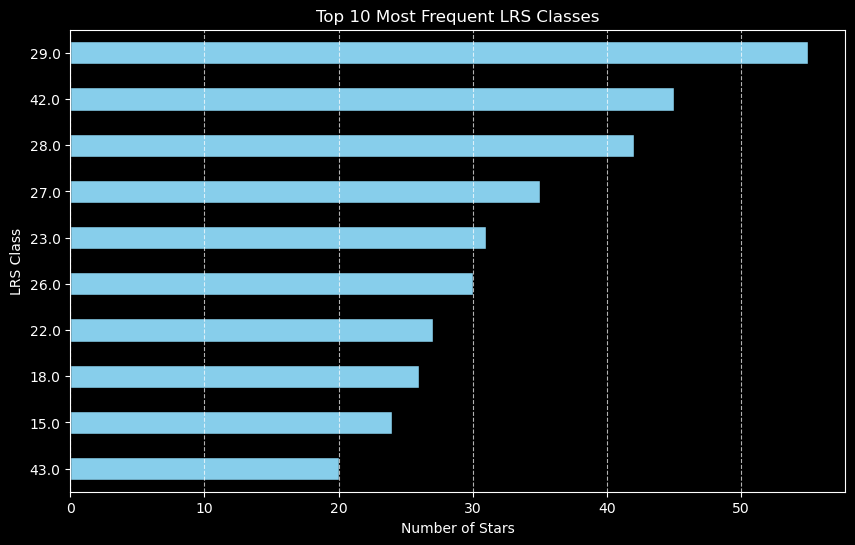

In [92]:
# grafico a barre orizzontali che illustra la distribuzione delle dieci classi spettrali più comuni all'interno del campione di 531 stelle analizzate
top_classes = df['class'].value_counts().head(10)

plt.figure(figsize=(10, 6))
top_classes.plot(kind='barh', color='skyblue', edgecolor='black')
plt.gca().invert_yaxis() 
plt.title('Top 10 Most Frequent LRS Classes')
plt.xlabel('Number of Stars') # numero di stelle appartenenti a ciascuna classe
plt.ylabel('LRS Class') # elenca i codici identificativi delle classi LRS (Low Resolution Spectrometer)
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.show()

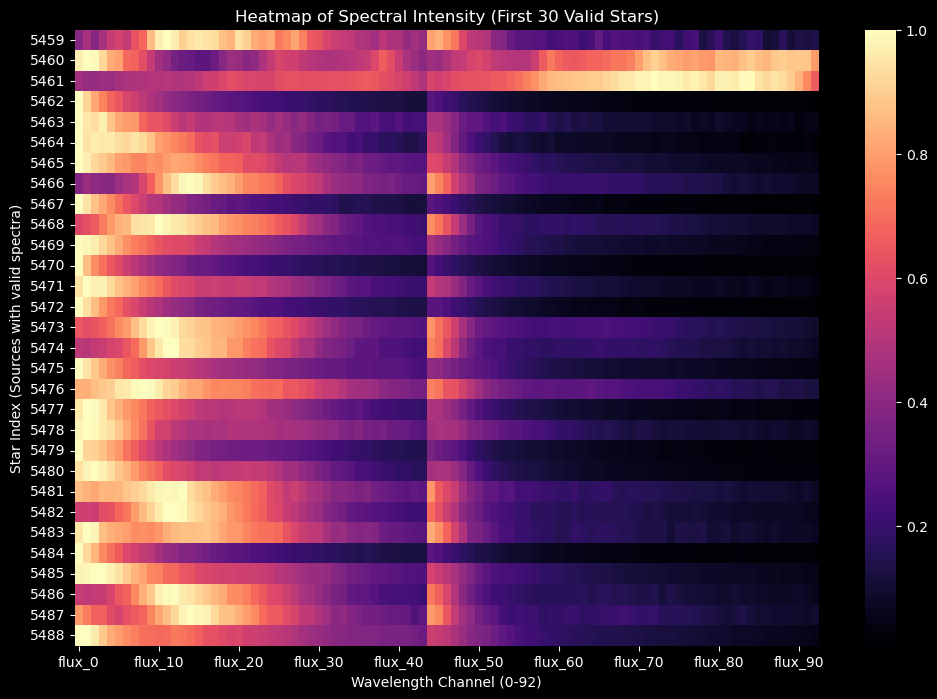

In [93]:
# heatmap che fornisce una visualizzazione d'insieme delle "impronte digitali" spettrali per le prime 30 stelle del dataset. 
# per identificare visivamente pattern comuni o anomalie tra diversi oggetti celesti contemporaneamente.
# Cerchiamo le righe dove flux_0 non è nullo
df_valid = df.dropna(subset=['flux_0'])

heatmap_data = df_valid.filter(like='flux_').head(30)
# dividiamo ogni riga per il suo massimo per vedere i pattern indipendentemente dalla luminosità
heatmap_norm = heatmap_data.div(heatmap_data.max(axis=1), axis=0)

plt.figure(figsize=(12, 8))
sns.heatmap(heatmap_norm, cmap='magma', xticklabels=10) #usiamo heatmap_norm per vedere i dettagli delle righe di assorbimento/emissione
plt.title('Heatmap of Spectral Intensity (First 30 Valid Stars)')
plt.xlabel('Wavelength Channel (0-92)')
plt.ylabel('Star Index (Sources with valid spectra)')
plt.show()

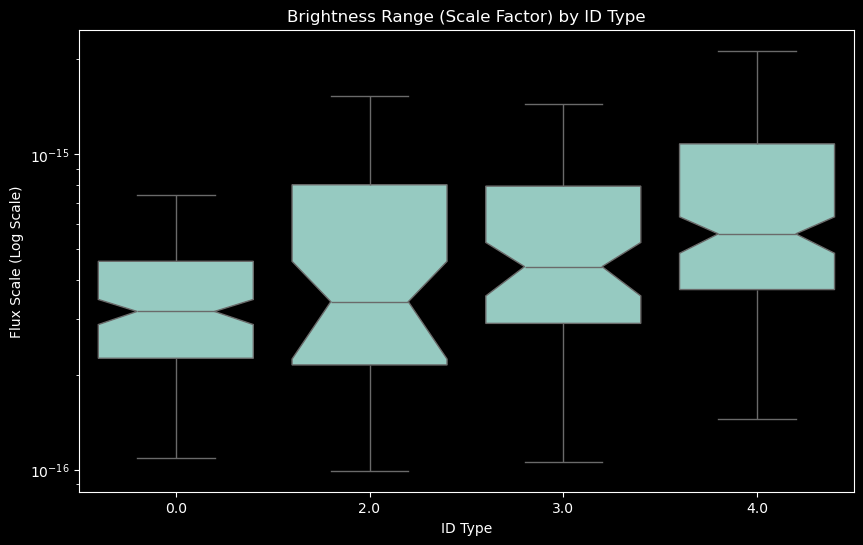

In [94]:
# boxplot che rappresenta la distribuzione del "fattore di scala" (l'intensità o la luminosità delle sorgenti luminose)
# suddivisa per le diverse categorie di ID Type del dataset

# il grafico permette di confrontare rapidamente quali ID Type presentano una luminosità più costante e quali invece mostrano una variabilità maggiore

plt.figure(figsize=(10, 6))

sns.boxplot( x='id_type', y='scale',data=df, notch=True,showfliers=False)
plt.yscale('log')
plt.title('Brightness Range (Scale Factor) by ID Type')
plt.xlabel('ID Type')
plt.ylabel('Flux Scale (Log Scale)')
plt.show()

In [95]:
vdata=datatype.sort_values('XLuminosity', ascending=False)
vdata.head(10).style.format({c: "{:.4e}" for c in cols}).set_properties(**{
    "background-color": "#1e1e1e",
    "color": "#8ecae6",
    "border-color": "#444"
}).set_table_styles([
    {"selector": "th", "props": [("background-color", "#333"), ("color", "#8ecae6")]},
    {"selector": "td", "props": [("border", "1px solid #444")]},
])
#HD 269542 -- Red SuperGiant Star

,EXTraS_Ape_v0.OBS_ID,EXTraS_Ape_v0.XMM_RA,EXTraS_Ape_v0.XMM_DEC,EXTraS_Ape_v0.XMM_EP_8_FLUX,EXTraS_Ape_v0.XMM_EP_8_FLUX_ERR,main_id,ra,dec,otype,main_type,other_types,plx,plx_err,B,V,R,J,H,K,u,g,r,i,z,distance_pc,distance_ly,distance_cm,XLuminosity,VisibleLuminosity,name,class,id_type,scale,b1,b2,r1,r2,flux_0,flux_1,flux_2,flux_3,flux_4,flux_5,flux_6,flux_7,flux_8,flux_9,flux_10,flux_11,flux_12,flux_13,flux_14,flux_15,flux_16,flux_17,flux_18,flux_19,flux_20,flux_21,flux_22,flux_23,flux_24,flux_25,flux_26,flux_27,flux_28,flux_29,flux_30,flux_31,flux_32,flux_33,flux_34,flux_35,flux_36,flux_37,flux_38,flux_39,flux_40,flux_41,flux_42,flux_43,flux_44,flux_45,flux_46,flux_47,flux_48,flux_49,flux_50,flux_51,flux_52,flux_53,flux_54,flux_55,flux_56,flux_57,flux_58,flux_59,flux_60,flux_61,flux_62,flux_63,flux_64,flux_65,flux_66,flux_67,flux_68,flux_69,flux_70,flux_71,flux_72,flux_73,flux_74,flux_75,flux_76,flux_77,flux_78,flux_79,flux_80,flux_81,flux_82,flux_83,flux_84,flux_85,flux_86,flux_87,flux_88,flux_89,flux_90,flux_91,flux_92
4646,770180201.000000,259.832000,57.995200,6.4391e-14,1.1349e-14,2MASS J17191999+5759430,259.833310,57.995309,*,Star,X|Opt|NIR|*|MIR|RG*,0.001900,0.096600,19.042000,18.412000,17.731000,16.536000,15.739000,15.779000,20.640000,18.837000,18.028000,17.682000,17.493000,526315.789474,1716610.526316,1624040831578947113189376.000000,2134186097765442353806513663071223808.000000,45254890288140069308574658575680405504.000000,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
962,690742401.000000,76.981200,-68.418300,6.9706e-13,4.0539e-14,OGLE LMC118.4 46009,76.981132,-68.418135,*,Star,NIR|*,0.035400,0.028200,15.016000,14.945000,nan,14.770000,nan,14.350000,nan,14.800000,15.020000,15.210000,15.420000,28248.587571,92134.463277,87166033333333337833472.000000,66554161977587238460384833272020992.000000,1083180120752482433272548024735760384.000000,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
996,690740601.000000,82.401100,-68.047000,4.0104e-14,1.1231e-14,2MASS J05293681-6802527,82.403324,-68.047956,*,Star,NIR|*,0.014600,0.033700,nan,15.190000,nan,15.066000,14.979000,14.601000,nan,nan,nan,nan,nan,68493.150685,223394.520548,211347779452054796238848.000000,22510680274824666108535077177655296.000000,7455144494608844568613495785310388224.000000,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
4891,763820101.000000,76.975600,-68.677400,1.3636e-14,8.4718e-15,SOI 355,76.977914,-68.676708,*,Star,NIR|*|MIR,0.009700,0.013000,13.125000,13.000000,nan,12.586000,12.511000,12.501000,nan,nan,nan,nan,nan,103092.783505,336243.298969,318111090721649516871680.000000,17339833334460815884778580358463488.000000,187636059216819586735294890256503930880.000000,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,na

In [96]:
vdata=datatype.sort_values('XLuminosity', ascending=False)
vdata.head(15).style.format({c: "{:.4e}" for c in cols}).set_properties(**{
    "background-color": "#1e1e1e",
    "color": "#8ecae6",
    "border-color": "#444"
}).set_table_styles([
    {"selector": "th", "props": [("background-color", "#333"), ("color", "#8ecae6")]},
    {"selector": "td", "props": [("border", "1px solid #444")]},
])
#HD 269542 -- Red SuperGiant Star

,EXTraS_Ape_v0.OBS_ID,EXTraS_Ape_v0.XMM_RA,EXTraS_Ape_v0.XMM_DEC,EXTraS_Ape_v0.XMM_EP_8_FLUX,EXTraS_Ape_v0.XMM_EP_8_FLUX_ERR,main_id,ra,dec,otype,main_type,other_types,plx,plx_err,B,V,R,J,H,K,u,g,r,i,z,distance_pc,distance_ly,distance_cm,XLuminosity,VisibleLuminosity,name,class,id_type,scale,b1,b2,r1,r2,flux_0,flux_1,flux_2,flux_3,flux_4,flux_5,flux_6,flux_7,flux_8,flux_9,flux_10,flux_11,flux_12,flux_13,flux_14,flux_15,flux_16,flux_17,flux_18,flux_19,flux_20,flux_21,flux_22,flux_23,flux_24,flux_25,flux_26,flux_27,flux_28,flux_29,flux_30,flux_31,flux_32,flux_33,flux_34,flux_35,flux_36,flux_37,flux_38,flux_39,flux_40,flux_41,flux_42,flux_43,flux_44,flux_45,flux_46,flux_47,flux_48,flux_49,flux_50,flux_51,flux_52,flux_53,flux_54,flux_55,flux_56,flux_57,flux_58,flux_59,flux_60,flux_61,flux_62,flux_63,flux_64,flux_65,flux_66,flux_67,flux_68,flux_69,flux_70,flux_71,flux_72,flux_73,flux_74,flux_75,flux_76,flux_77,flux_78,flux_79,flux_80,flux_81,flux_82,flux_83,flux_84,flux_85,flux_86,flux_87,flux_88,flux_89,flux_90,flux_91,flux_92
4646,770180201.000000,259.832000,57.995200,6.4391e-14,1.1349e-14,2MASS J17191999+5759430,259.833310,57.995309,*,Star,X|Opt|NIR|*|MIR|RG*,0.001900,0.096600,19.042000,18.412000,17.731000,16.536000,15.739000,15.779000,20.640000,18.837000,18.028000,17.682000,17.493000,526315.789474,1716610.526316,1624040831578947113189376.000000,2134186097765442353806513663071223808.000000,45254890288140069308574658575680405504.000000,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
962,690742401.000000,76.981200,-68.418300,6.9706e-13,4.0539e-14,OGLE LMC118.4 46009,76.981132,-68.418135,*,Star,NIR|*,0.035400,0.028200,15.016000,14.945000,nan,14.770000,nan,14.350000,nan,14.800000,15.020000,15.210000,15.420000,28248.587571,92134.463277,87166033333333337833472.000000,66554161977587238460384833272020992.000000,1083180120752482433272548024735760384.000000,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
996,690740601.000000,82.401100,-68.047000,4.0104e-14,1.1231e-14,2MASS J05293681-6802527,82.403324,-68.047956,*,Star,NIR|*,0.014600,0.033700,nan,15.190000,nan,15.066000,14.979000,14.601000,nan,nan,nan,nan,nan,68493.150685,223394.520548,211347779452054796238848.000000,22510680274824666108535077177655296.000000,7455144494608844568613495785310388224.000000,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
4891,763820101.000000,76.975600,-68.677400,1.3636e-14,8.4718e-15,SOI 355,76.977914,-68.676708,*,Star,NIR|*|MIR,0.009700,0.013000,13.125000,13.000000,nan,12.586000,12.511000,12.501000,nan,nan,nan,nan,nan,103092.783505,336243.298969,318111090721649516871680.000000,17339833334460815884778580358463488.000000,187636059216819586735294890256503930880.000000,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,na

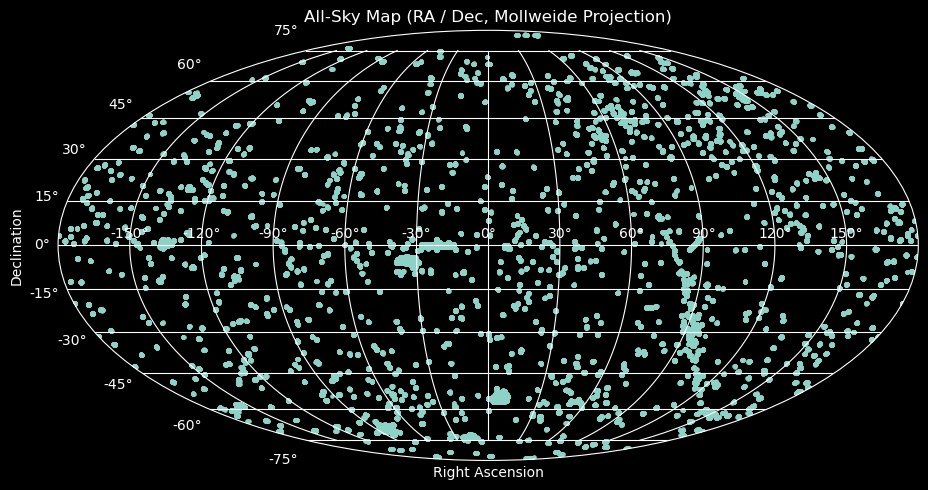

In [97]:

df = pd.read_csv("headedBigData.csv")  

ra = df["EXTraS_Ape_v0.XMM_RA"].values
dec = df["EXTraS_Ape_v0.XMM_DEC"].values

# Convert to radians for Mollweide projection
ra_rad = np.deg2rad(ra)
dec_rad = np.deg2rad(dec)

# Wrap RA at 180° and reverse direction (astronomy convention)
ra_rad = np.remainder(ra_rad + 2*np.pi, 2*np.pi)
ra_rad[ra_rad > np.pi] -= 2*np.pi
ra_rad = -ra_rad

# Plot
plt.figure(figsize=(10, 5))
ax = plt.subplot(111, projection="mollweide")

ax.scatter(ra_rad, dec_rad, s=4, alpha=0.6)

ax.set_xlabel("Right Ascension")
ax.set_ylabel("Declination")
ax.set_title("All-Sky Map (RA / Dec, Mollweide Projection)")
ax.grid(True)

plt.tight_layout()
plt.show()


/var/folders/7_/qw3sy4r152x3ww4y67spwck00000gn/T/ipykernel_50420/3100506904.py:1: DtypeWarning: Columns (29) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("combined_vertical.csv")


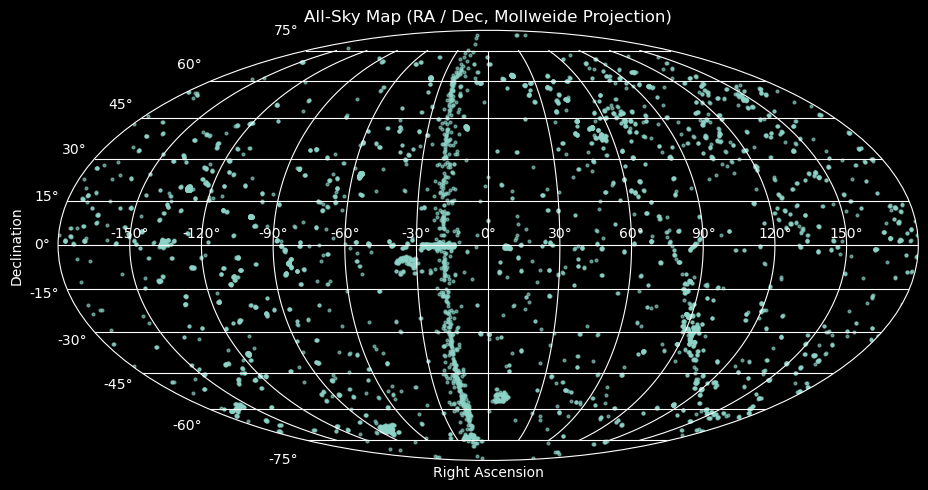

In [98]:
df = pd.read_csv("combined_vertical.csv")  

ra = df["ra"].values
dec = df["dec"].values

# Convert to radians for Mollweide projection
ra_rad = np.deg2rad(ra)
dec_rad = np.deg2rad(dec)

# Wrap RA at 180° and reverse direction (astronomy convention)
ra_rad = np.remainder(ra_rad + 2*np.pi, 2*np.pi)
ra_rad[ra_rad > np.pi] -= 2*np.pi
ra_rad = -ra_rad

# Plot
plt.figure(figsize=(10, 5))
ax = plt.subplot(111, projection="mollweide")

ax.scatter(ra_rad, dec_rad, s=4, alpha=0.6)

ax.set_xlabel("Right Ascension")
ax.set_ylabel("Declination")
ax.set_title("All-Sky Map (RA / Dec, Mollweide Projection)")
ax.grid(True)

plt.tight_layout()
plt.show()